# Human Activity Recognition using UCI HAR Dataset
This notebook demonstrates activity classification using both **Deep Learning** (LSTM, 1D CNN) and **Machine Learning** (Random Forest, SVM, Logistic Regression).

import libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, LSTM, Flatten, Dropout, MaxPooling1D
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


DATASET DOWNLOAD & UNZIP

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip
!unzip "UCI HAR Dataset.zip"


--2025-02-11 10:48:18--  https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘UCI HAR Dataset.zip’

UCI HAR Dataset.zip     [    <=>             ]  58.17M  95.3MB/s    in 0.6s    

2025-02-11 10:48:19 (95.3 MB/s) - ‘UCI HAR Dataset.zip’ saved [60999314]

Archive:  UCI HAR Dataset.zip
   creating: UCI HAR Dataset/
  inflating: UCI HAR Dataset/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/UCI HAR Dataset/
  inflating: __MACOSX/UCI HAR Dataset/._.DS_Store  
  inflating: UCI HAR Dataset/activity_labels.txt  
  inflating: __MACOSX/UCI HAR Dataset/._activity_labels.txt  
  inflating: UCI HAR Dataset/features.txt  
  inflating: __MACOSX/UCI HAR Dataset/._features.txt  
  inflating: UCI HAR Dataset/features_info.t

In [3]:
!cat "UCI HAR Dataset/activity_labels.txt"


1 WALKING
2 WALKING_UPSTAIRS
3 WALKING_DOWNSTAIRS
4 SITTING
5 STANDING
6 LAYING


DATASET PREVIEW

In [4]:
features = pd.read_csv("UCI HAR Dataset/features.txt", delim_whitespace=True, header=None)
features.head(10)  # View first 10 feature names


<ipython-input-4-9e391cc63bf1>:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  features = pd.read_csv("UCI HAR Dataset/features.txt", delim_whitespace=True, header=None)


,0,1
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
5,6,tBodyAcc-std()-Z
6,7,tBodyAcc-mad()-X
7,8,tBodyAcc-mad()-Y
8,9,tBodyAcc-mad()-Z
9,10,tBodyAcc-max()-X


DATA PREPROCESSING

In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load training and test data
X_train = pd.read_csv("UCI HAR Dataset/train/X_train.txt", delim_whitespace=True, header=None)
y_train = pd.read_csv("UCI HAR Dataset/train/y_train.txt", delim_whitespace=True, header=None)

X_test = pd.read_csv("UCI HAR Dataset/test/X_test.txt", delim_whitespace=True, header=None)
y_test = pd.read_csv("UCI HAR Dataset/test/y_test.txt", delim_whitespace=True, header=None)

# Encode labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train.values.ravel())
y_test = label_encoder.transform(y_test.values.ravel())

# Standardize data (Feature Scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape for Deep Learning models
X_train_dl = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_dl = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


<ipython-input-6-2f020ef40d02>:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv("UCI HAR Dataset/train/X_train.txt", delim_whitespace=True, header=None)
<ipython-input-6-2f020ef40d02>:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_train = pd.read_csv("UCI HAR Dataset/train/y_train.txt", delim_whitespace=True, header=None)
<ipython-input-6-2f020ef40d02>:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv("UCI HAR Dataset/test/X_test.txt", delim_whitespace=True, header=None)
<ipython-input-6-2f020ef40d02>:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_tes

DATA VISUALIZATION

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


<ipython-input-15-eb1a6819ac33>:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('/content/UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)


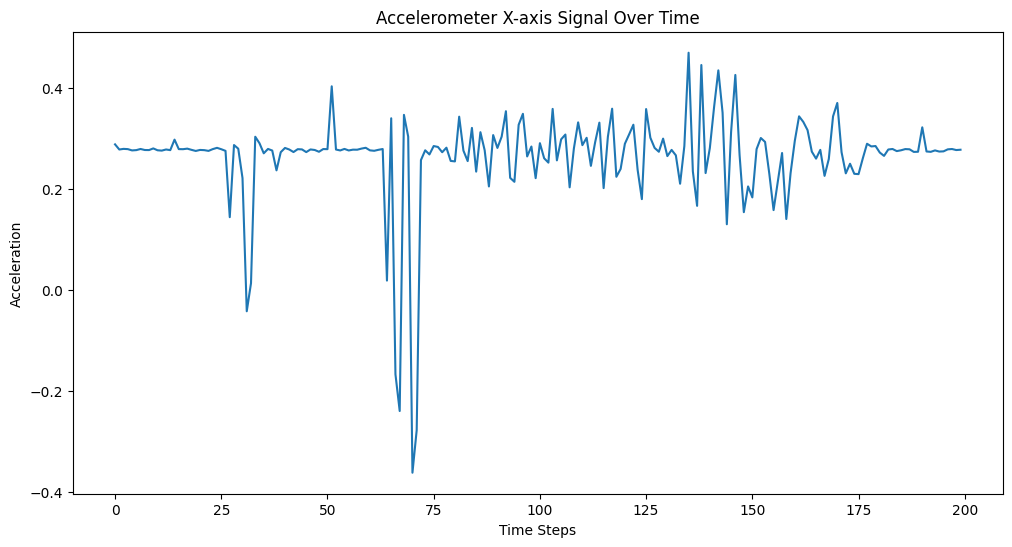

In [15]:
# Load the dataset (modify path accordingly)
df = pd.read_csv('/content/UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)

# Select a specific feature column (e.g., first feature column)
plt.figure(figsize=(12, 6))
plt.plot(df.iloc[0:200, 0])  # First 200 samples
plt.title("Accelerometer X-axis Signal Over Time")
plt.xlabel("Time Steps")
plt.ylabel("Acceleration")
plt.show()


<ipython-input-16-1ad8f75da73b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=activity_labels['Activity'], palette="viridis")


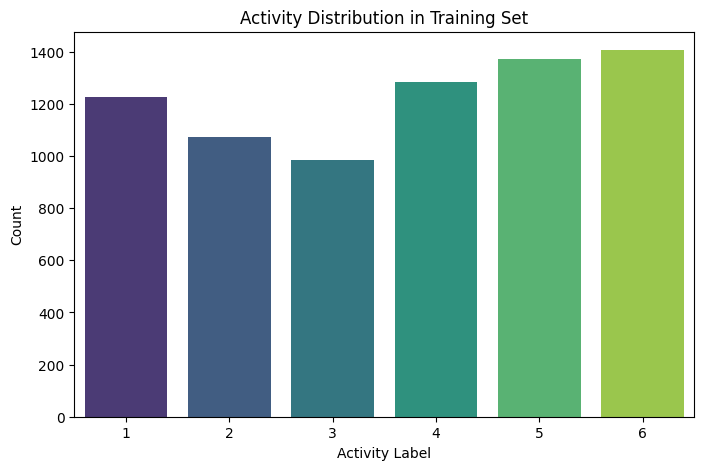

In [16]:
# Load activity labels
activity_labels = pd.read_csv('/content/UCI HAR Dataset/train/y_train.txt', header=None, names=['Activity'])

# Count the number of occurrences for each activity
plt.figure(figsize=(8, 5))
sns.countplot(x=activity_labels['Activity'], palette="viridis")
plt.title("Activity Distribution in Training Set")
plt.xlabel("Activity Label")
plt.ylabel("Count")
plt.show()


LSTM MODEL

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define LSTM Model
lstm_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(32),
     Dense(100, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')
])

lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the LSTM model
lstm_model.fit(X_train_dl, y_train, epochs=10, batch_size=32, validation_data=(X_test_dl, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - accuracy: 0.3351 - loss: 1.3669 - val_accuracy: 0.5528 - val_loss: 0.9767
Epoch 2/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.5781 - loss: 0.9287 - val_accuracy: 0.6033 - val_loss: 0.9277
Epoch 3/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - accuracy: 0.5939 - loss: 0.9284 - val_accuracy: 0.6569 - val_loss: 0.8222
Epoch 4/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - accuracy: 0.6747 - loss: 0.7702 - val_accuracy: 0.6977 - val_loss: 0.6823
Epoch 5/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.7463 - loss: 0.6314 - val_accuracy: 0.7292 - val_loss: 0.6483
Epoch 6/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.7606 - loss: 0.5934 - val_accuracy: 0.7357 - val_loss: 0.6068
Epoch 7/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.7972 - loss: 0.5061 - val_accuracy: 0.7503 - val_loss: 0.5990
Epoch 8/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.7940 - loss: 0.5045 - v

1D CNN MODEL

In [11]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

# Define 1D CNN Model
cnn_model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(6, activation='softmax')
])

cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the CNN model
cnn_model.fit(X_train_dl, y_train, epochs=10, batch_size=32, validation_data=(X_test_dl, y_test))


Epoch 1/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8288 - loss: 0.4563 - val_accuracy: 0.9430 - val_loss: 0.1659
Epoch 2/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9713 - loss: 0.0787 - val_accuracy: 0.9332 - val_loss: 0.1834
Epoch 3/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9798 - loss: 0.0519 - val_accuracy: 0.8446 - val_loss: 0.5908
Epoch 4/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9804 - loss: 0.0593 - val_accuracy: 0.9386 - val_loss: 0.2085
Epoch 5/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9883 - loss: 0.0323 - val_accuracy: 0.9522 - val_loss: 0.1521
Epoch 6/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9937 - loss: 0.0206 - val_accuracy: 0.9460 - val_loss: 0.1923
Epoch 7/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9955 - loss: 0.0152 - val_accuracy: 0.9501 - val_loss: 0.1683
Epoch 8/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9888 - loss: 0.0253 - val_accuracy: 0

**BEST- 1D CNN model with accuracy of 99.52%**

NORMAL ML MODELS

Random Forest

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

rf_preds = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))


Random Forest Accuracy: 0.9250084832032576


SVM

In [7]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

svm_preds = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_preds))


SVM Accuracy: 0.9521547336274178


Logistic regression

In [8]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)

lr_preds = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_preds))


Logistic Regression Accuracy: 0.9552086868001357


SVM is giving better results as compared to randomforrest

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(SVC(), param_grid, cv=3)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'C': 0.1, 'kernel': 'linear'}
